In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
np.random.seed(24)

In [2]:
data = load_digits()

In [3]:
X = data['data']
y = (data['target'] >= 7).astype(np.int32)

<Figure size 432x288 with 0 Axes>

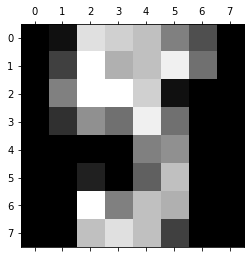

5


In [4]:
plt.gray()
index = np.random.randint(0, len(X) - 1)
plt.matshow(X[index].reshape(8, 8))
plt.show()
print(data.target[index])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.77,
                                                    shuffle=True)

In [6]:
X_train.shape, X_test.shape

((1383, 64), (414, 64))

In [7]:
def loss (fact, prediction):
    return -np.sum(fact*np.log(prediction)-(1-fact)*np.log(1-prediction), axis=0)/len(fact)

In [8]:
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

In [9]:
m, n = X_train.shape

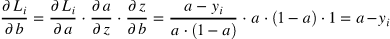

In [10]:
class regression:
    def __init__(self):
        self.weight = np.random.randn(n,1) * 0.001
        self.bias = np.random.randn() * 0.001
        self.report_every = 25
    def train(self, X, y, lr = 0.005, iters = 25):
        self.losses_train = []
        self.losses_test = []
        
        for iteration in range(iters):
            dw = np.zeros((n,1))
            db = 0
            
            for i in range (len(X)):
                z = X[i].reshape(1, n).dot(self.weight) + self.bias
                a = sigmoid(z)[0][0]
                
                dw += (a - y[i]) * X[i].reshape(n, 1)
                db += (a - y[i])
                
            dw /= len(X)
            db /= len(X)
            
            self.weight = self.weight - lr * dw
            self.bias = self.bias - lr * db
            
            if iteration % self.report_every == 0:
                self.losses_train.append(loss(y, self.predict(X)))
                self.losses_test.append(loss(y_test, self.predict(X_test)))
                
    

    def predict(self, X):        
        return np.array([sigmoid(x.reshape(1, n).dot(self.weight) + self.bias)[0][0] 
                         for x in X])          
                
            

In [15]:
%%time
logreg = regression()
logreg.train(X_train, y_train, iters=200)

Wall time: 3.83 s


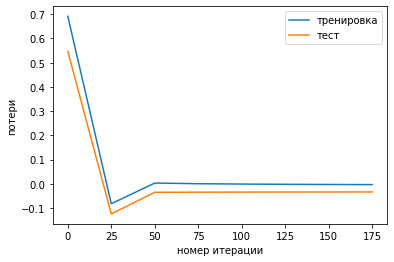

In [16]:
domain = np.arange(0, len(logreg.losses_train)) * logreg.report_every
plt.plot(domain, logreg.losses_train, label='тренировка')
plt.plot(domain, logreg.losses_test, label='тест')
plt.xlabel('номер итерации')
plt.ylabel('потери')
plt.legend();

In [13]:
train_prediction = np.array(logreg.predict(X_train))
train_accuracy = np.sum((train_prediction > 0.5) == y_train) / len(train_prediction)
print(f'Точность: {round(train_accuracy * 100, 2)}%')

Точность: 93.85%
